In [2]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [3]:
# jupyter notebook specific commands
%matplotlib inline
plt.rcParams['figure.figsize'] = [10, 5]

In [4]:
directory = '../csv/'
files = os.listdir(directory)

In [ ]:
for file in files

In [5]:
df = pd.DataFrame()

In [6]:
_ = [print(i) for i in range(-20, 20, 2)]

-20
-18
-16
-14
-12
-10
-8
-6
-4
-2
0
2
4
6
8
10
12
14
16
18


In [7]:
files

['m_pu_8.csv',
 'm_8.csv',
 'm_-8.csv',
 'm_pu_-18.csv',
 'm_16.csv',
 'm_p_-2.csv',
 'm_p_10.csv',
 'm_p_-12.csv',
 'm_pu_-20.csv',
 'i_q_-20.csv',
 'm_pu_14.csv',
 'i_q_-10.csv',
 'm_p_-10.csv',
 'm_pu_12.csv',
 'm_12.csv',
 'm_-20.csv',
 'm_pu_-8.csv',
 'm_p_16.csv',
 'm_p_0.csv',
 'm_14.csv',
 'i_q_-4.csv',
 'm_pu_10.csv',
 'm_p_18.csv',
 'm_p_-20.csv',
 'm_-14.csv',
 'm_pu_2.csv',
 'm_pu_-6.csv',
 'i_q_10.csv',
 'i_q_0.csv',
 'i_q_-16.csv',
 'm_p_12.csv',
 'm_-18.csv',
 'i_q_-18.csv',
 'm_pu_-10.csv',
 'm_0.csv',
 'm_pu_-14.csv',
 'm_-4.csv',
 'i_q_-2.csv',
 'i_q_4.csv',
 'm_p_4.csv',
 'm_p_-6.csv',
 'i_q_18.csv',
 'm_p_14.csv',
 'i_q_-6.csv',
 'i_q_16.csv',
 'm_18.csv',
 'i_q_14.csv',
 'm_p_-4.csv',
 'm_-6.csv',
 'm_p_2.csv',
 'm_pu_4.csv',
 'm_pu_-12.csv',
 'i_q_2.csv',
 'i_q_-14.csv',
 'm_pu_-2.csv',
 'm_-10.csv',
 'm_2.csv',
 'i_q_-8.csv',
 'm_pu_16.csv',
 'm_pu_6.csv',
 'i_q_12.csv',
 'm_pu_-4.csv',
 'm_pu_0.csv',
 'm_4.csv',
 'i_q_-12.csv',
 'm_p_8.csv',
 'm_p_6.csv',
 'm_p_

In [8]:
for file in files:  
    idx = file[:-4]
    idx = idx.rsplit('_', 1)
    idx[1] = int(idx[1])
    idx = list(zip(idx))
    
    print(idx)

[('m',), (-6,)]
[('m_p',), (6,)]
[('m_p',), (0,)]
[('i_q',), (8,)]
[('m_pu',), (-10,)]
[('i_q',), (-8,)]
[('m',), (14,)]
[('m_pu',), (4,)]
[('m_pu',), (6,)]
[('m_pu',), (-8,)]
[('m_pu',), (18,)]
[('m_p',), (16,)]
[('i_q',), (6,)]
[('i_q',), (10,)]
[('m',), (10,)]
[('m',), (-2,)]
[('i_q',), (12,)]
[('i_q',), (0,)]
[('m_pu',), (10,)]
[('m',), (6,)]
[('m_p',), (-4,)]
[('m_pu',), (2,)]
[('m',), (4,)]
[('i_q',), (16,)]
[('i_q',), (18,)]
[('m',), (-16,)]
[('m',), (2,)]
[('m',), (0,)]
[('m_p',), (-6,)]
[('i_q',), (-16,)]
[('m_pu',), (8,)]
[('m',), (8,)]
[('m',), (-14,)]
[('i_q',), (4,)]
[('m',), (-18,)]
[('m_p',), (12,)]
[('m_pu',), (-16,)]
[('i_q',), (-14,)]
[('m',), (-4,)]
[('m',), (-12,)]
[('i_q',), (14,)]
[('m_p',), (-20,)]
[('m_pu',), (-12,)]
[('m_p',), (4,)]
[('m_p',), (18,)]
[('m_pu',), (-20,)]
[('i_q',), (-18,)]
[('m',), (-8,)]
[('m_pu',), (-4,)]
[('m_pu',), (0,)]
[('m_p',), (10,)]
[('m_p',), (-8,)]
[('i_q',), (2,)]
[('m_pu',), (-18,)]
[('m_p',), (-16,)]
[('m_p',), (-2,)]
[('m_pu',), 

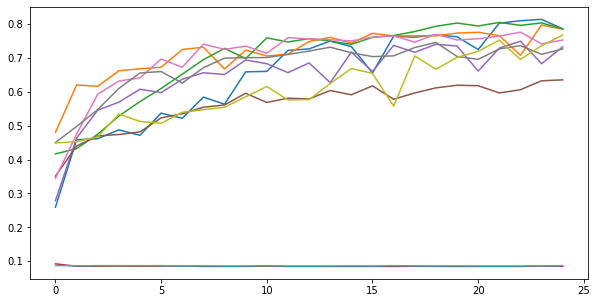

In [27]:
for file in files:  
    if 'i_q' in file:
        if '-' not in file:
            df = pd.read_csv(f'{directory}{file}')
            df['val_acc'].plot()
#     df['acc'].plot()